In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

In [32]:
traindata = pd.read_pickle("./traindata.pkl")
full = pd.read_pickle("./full.pkl")

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


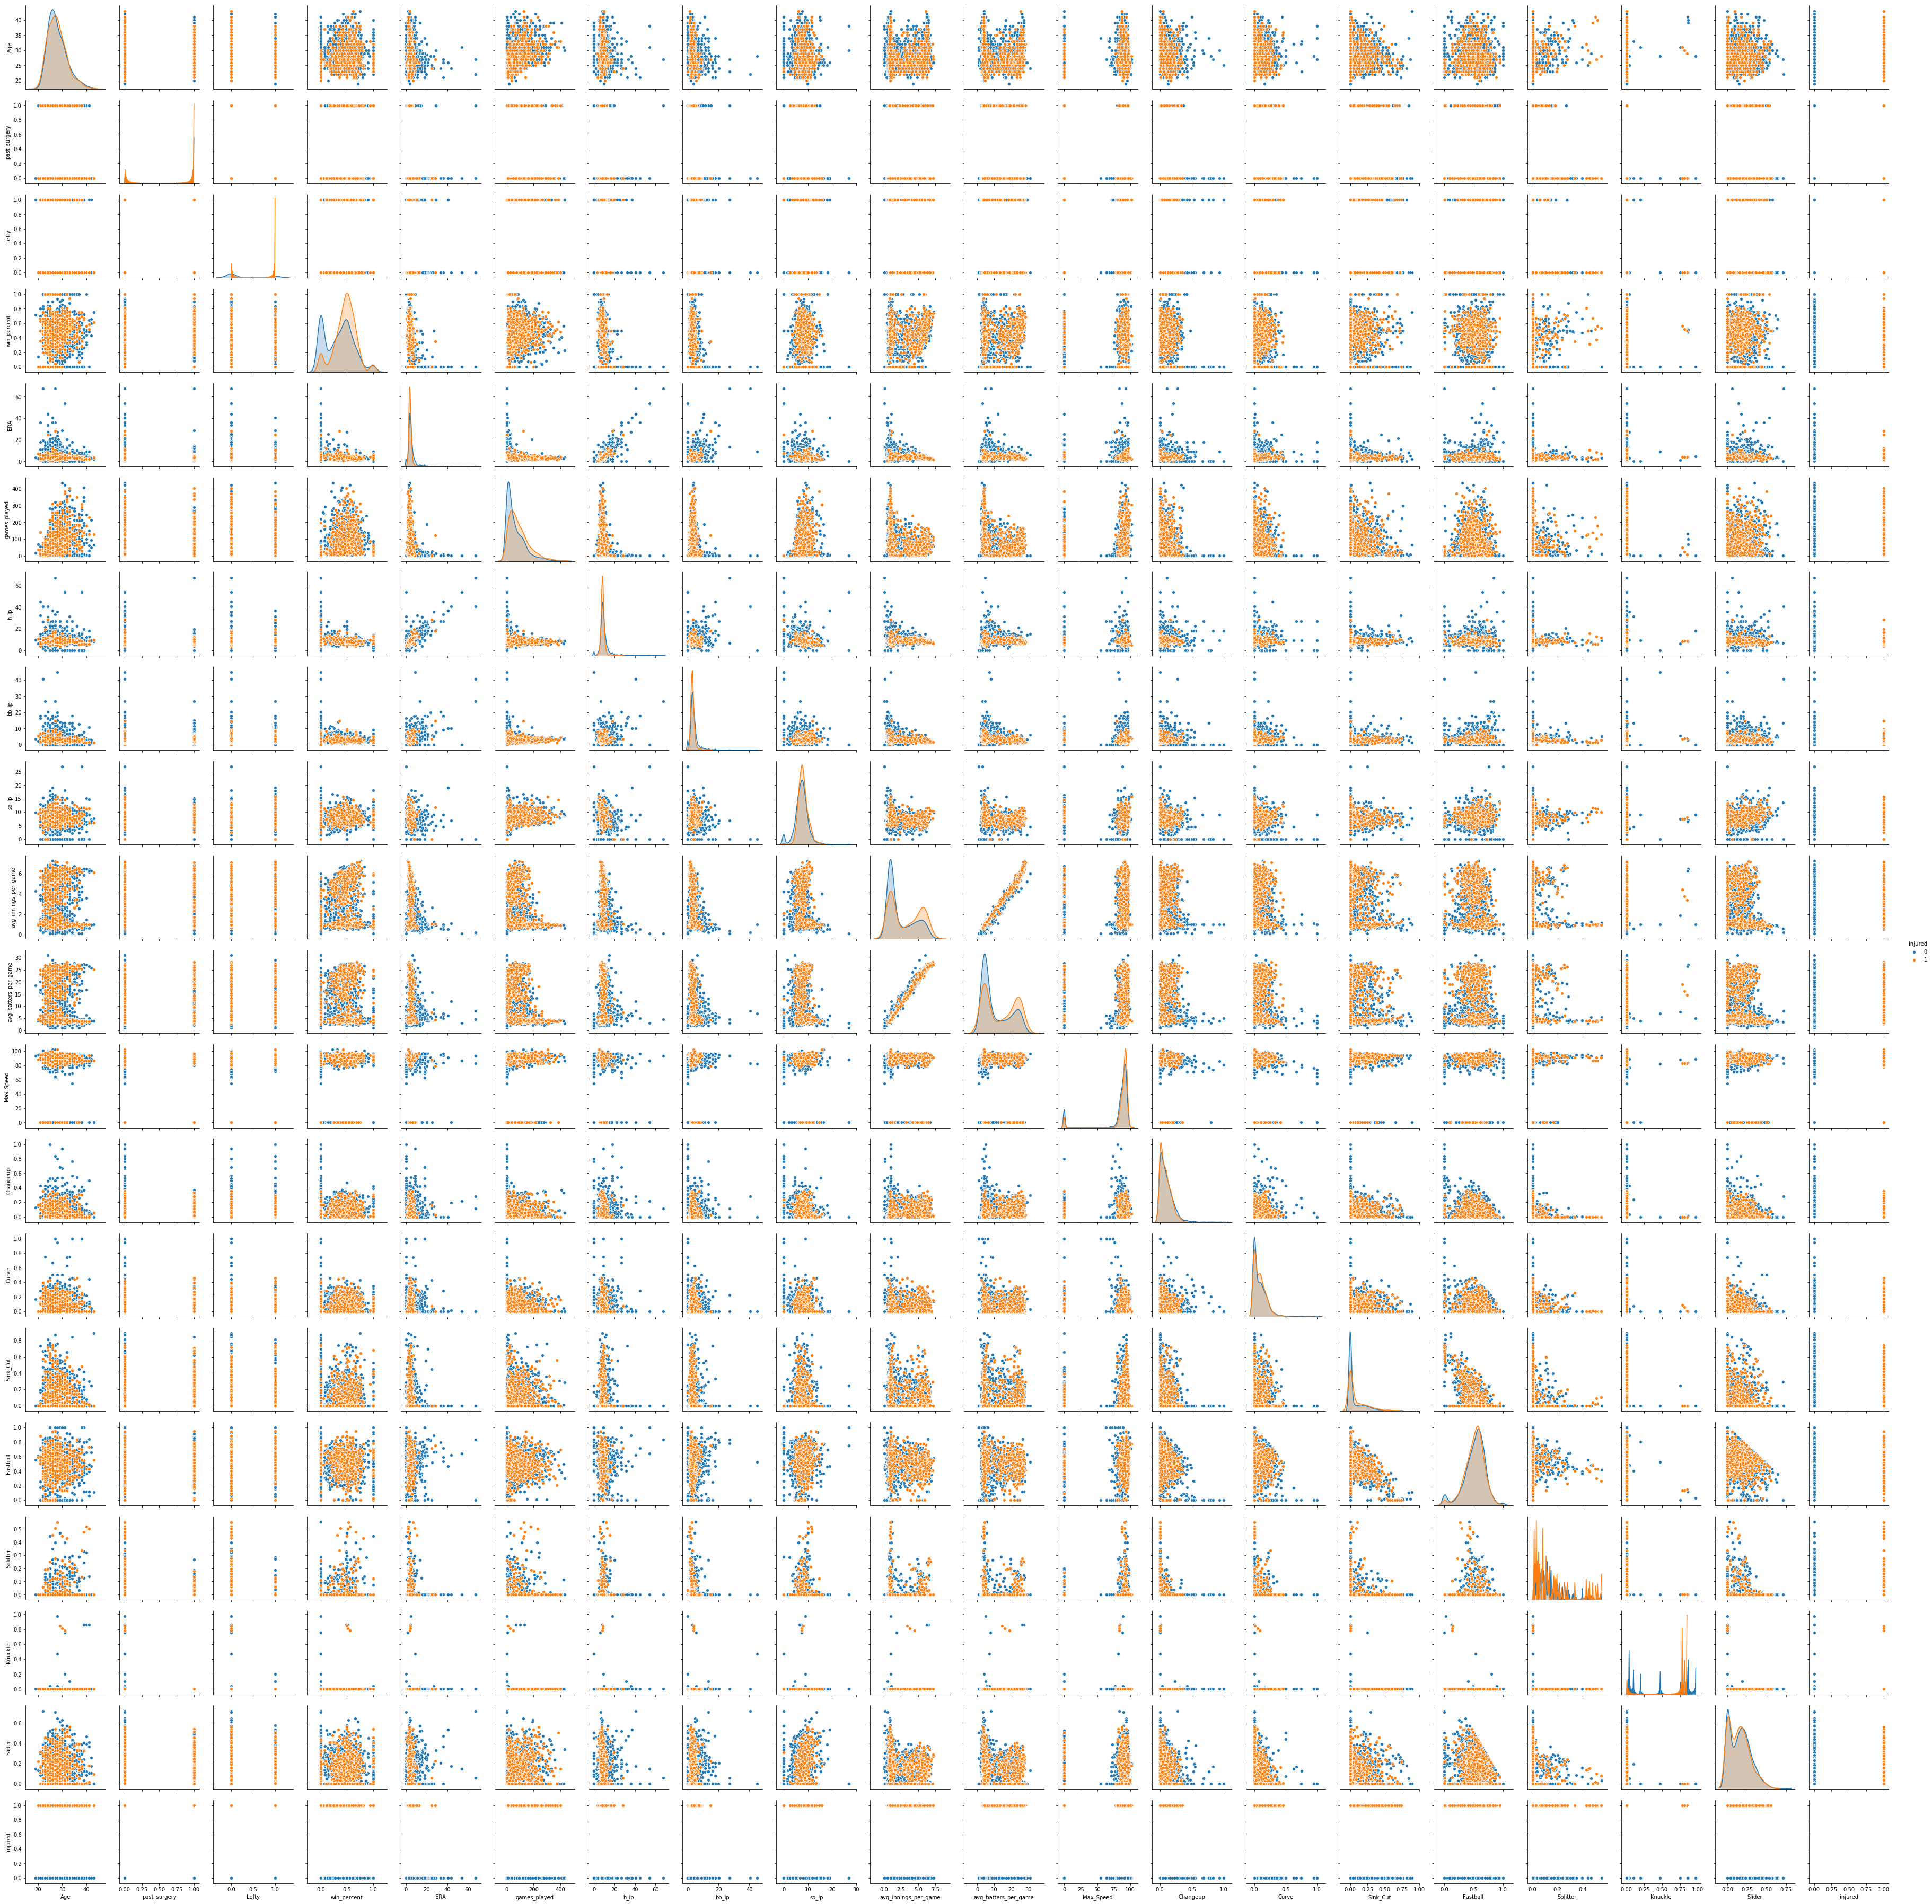

In [171]:
sns.pairplot(traindata, hue='injured');

In [5]:
traindata.corr()

,Age,past_surgery,Lefty,win_percent,ERA,games_played,h_ip,bb_ip,so_ip,avg_innings_per_game,...,Max_Speed,Changeup,Curve,Sinker,Cutter,Fastball,Splitter,Knuckle,Slider,injured
Age,1.000000,0.117009,-0.015328,0.113327,-0.088011,0.372835,-0.041269,-0.114672,-0.015423,-0.048830,...,-0.050827,-0.070886,0.006545,-0.044228,0.140744,-0.080137,0.167098,0.086207,0.015976,-0.015526
past_surgery,0.117009,1.000000,-0.042523,0.131261,-0.044665,0.052681,-0.042171,-0.030896,0.043654,0.060718,...,-0.028438,-0.057160,0.018243,-0.000390,0.038822,0.006724,-0.033048,-0.029259,-0.009775,0.120879
Lefty,-0.015328,-0.042523,1.000000,-0.028710,-0.036187,0.032552,-0.003700,0.012193,-0.005729,-0.039141,...,-0.054576,0.115843,-0.022069,0.083414,-0.037373,-0.031459,-0.116485,-0.034754,0.003832,-0.045450
win_percent,0.113327,0.131261,-0.028710,1.000000,-0.298775,0.325571,-0.280083,-0.267320,0.173426,0.238503,...,0.040138,-0.070130,-0.053703,0.012669,0.093807,-0.003157,0.049950,-0.008544,-0.031481,0.207496
ERA,-0.088011,-0.044665,-0.036187,-0.298775,1.000000,-0.228333,0.789349,0.473254,-0.149926,-0.096869,...,-0.024400,0.034552,-0.022023,-0.025340,-0.067472,0.036284,-0.022967,-0.012312,0.057591,-0.125988
games_played,0.372835,0.052681,0.032552,0.325571,-0.228333,1.000000,-0.228028,-0.165211,0.281962,-0.150003,...,0.023281,-0.148082,-0.100601,0.028279,0.093146,-0.014140,0.047746,-0.025486,0.065892,0.168048
h_ip,-0.041269,-0.042171,-0.003700,-0.280083,0.789349,-0.228028,1.000000,0.255742,-0.190249,-0.057087,...,-0.041020,0.072465,-0.002087,0.018502,-0.046892,-0.018470,-0.025721,-0.002405,0.016439,-0.120677
bb_ip,-0.114672,-0.030896,0.012193,-0.267320,0.473254,-0.165211,0.255742,1.000000,-0.020447,-0.214589,...,-0.017626,-0.059233,-0.084801,-0.020777,-0.083375,0.079512,-0.040128,0.051138,0.080922,-0.132882
so_ip,-0.015423,0.043654,-0.005729,0.173426,-0.149926,0.281962,-0.190249,-0.020447,1.000000,-0.124157,...,0.018294,-0.203347,-0.145355,-0.037921,-0.013911,0.104715,0.058975,-0.013643,0.169012,0.117543
avg_innings_per_game,-0.048830,0.060718,-0.039141,0.238503,-0.096869,-0.150003,-0.057087,-0.214589,-0.124157,1.000000,...,0.050370,0.175630,0.137053,-0.018121,0.066922,-0.098996,-0.024617,0.039003,-0.207481,0.179719


In [6]:
injured = traindata[traindata.injured == 1]
not_injured = traindata[traindata.injured == 0]

In [7]:
injured.shape

(606, 22)

In [8]:
not_injured.shape

(1674, 22)

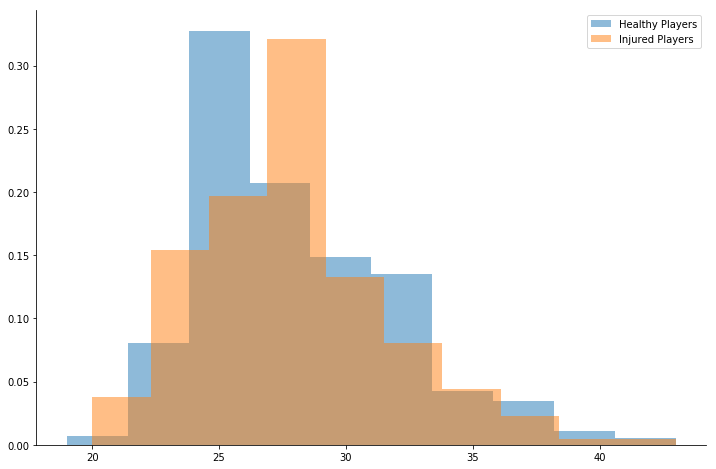

In [13]:
fig, ax = plt.subplots(figsize=[12,8])

weights_inj = np.ones_like(injured.Age)/float(len(injured.Age))
weights_not_inj = np.ones_like(not_injured.Age)/float(len(not_injured.Age))

plt.hist(not_injured.Age, weights=weights_not_inj, alpha=0.5, label='Healthy Players')
plt.hist(injured.Age, weights=weights_inj, alpha=0.5,label='Injured Players')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend();

In [113]:
injured.past_surgery.value_counts()

0    461
1    149
Name: past_surgery, dtype: int64

In [115]:
not_injured.past_surgery.value_counts()

0    1511
1     244
Name: past_surgery, dtype: int64

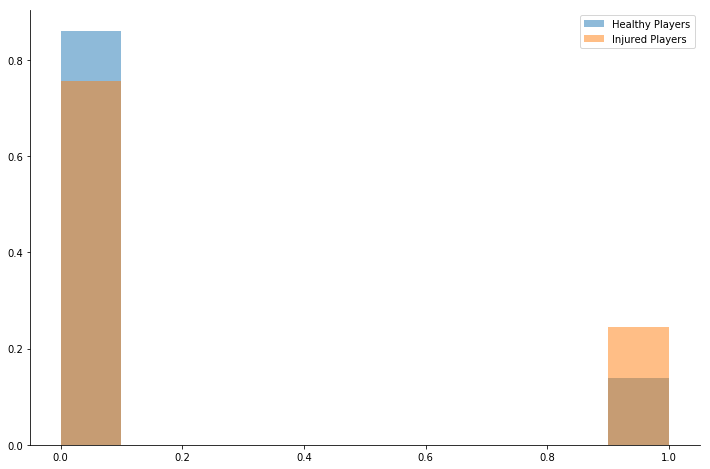

In [14]:
fig, ax = plt.subplots(figsize=[12,8])

weights_inj = np.ones_like(injured.past_surgery)/float(len(injured.past_surgery))
weights_not_inj = np.ones_like(not_injured.past_surgery)/float(len(not_injured.past_surgery))

plt.hist(not_injured.past_surgery, weights=weights_not_inj, alpha=0.5, label='Healthy Players')
plt.hist(injured.past_surgery, weights=weights_inj, alpha=0.5,label='Injured Players')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend();

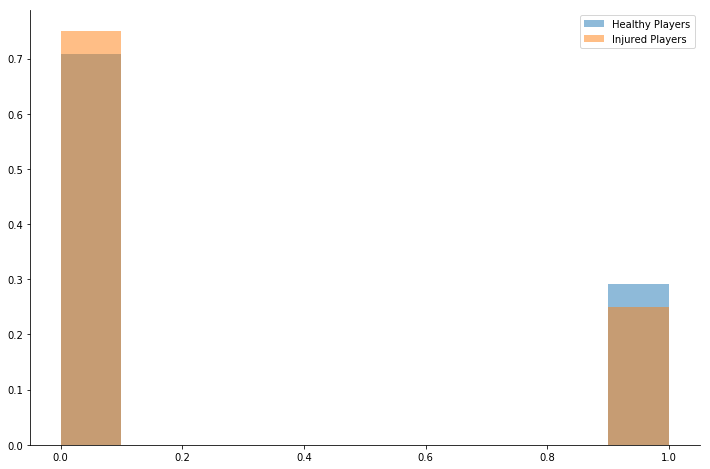

In [15]:
fig, ax = plt.subplots(figsize=[12,8])

weights_inj = np.ones_like(injured.Lefty)/float(len(injured.Lefty))
weights_not_inj = np.ones_like(not_injured.Lefty)/float(len(not_injured.Lefty))

plt.hist(not_injured.Lefty, weights=weights_not_inj, alpha=0.5, label='Healthy Players')
plt.hist(injured.Lefty, weights=weights_inj, alpha=0.5,label='Injured Players')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend();

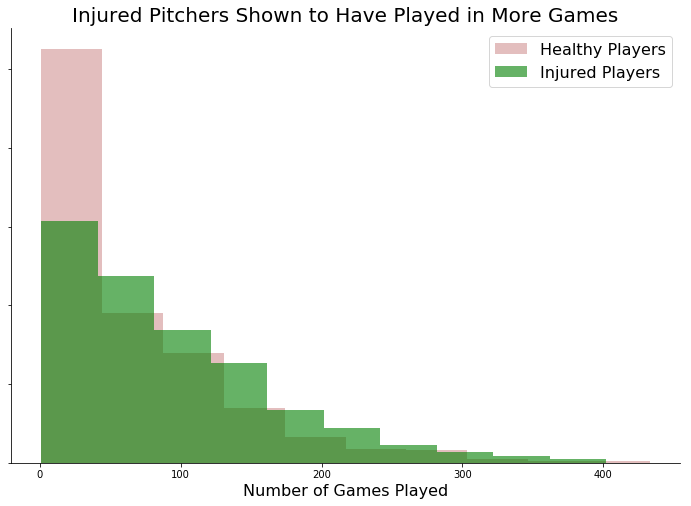

In [50]:
fig, ax = plt.subplots(figsize=[12,8])

weights_inj = np.ones_like(injured.games_played)/float(len(injured.games_played))
weights_not_inj = np.ones_like(not_injured.games_played)/float(len(not_injured.games_played))

plt.hist(not_injured.games_played, weights=weights_not_inj, color='brown',alpha=0.3, label='Healthy Players')
plt.hist(injured.games_played, weights=weights_inj, color='g',alpha=0.6,label='Injured Players')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.setp(ax.get_yticklabels(), visible=False)

plt.title('Injured Pitchers Shown to Have Played in More Games', fontsize=20)
plt.xlabel('Number of Games Played', fontsize=16)

plt.legend(prop={'size': 16});

In [10]:
injured = full[full.injured == 1]
not_injured = full[full.injured == 0]

In [33]:
full['Sink_Cut'] = full['Sinker'] + full['Cutter']

del full['Sinker']
del full['Cutter']

In [424]:
for name in names:
    df = full[full.Name == name]
    df = df[['Name', 'Year', 'injured', 'Sink_Cut']]
    dfname = name[0] + name.split()[1]
    
    if not(df[df.injured == 1].empty):
        df.to_csv('cutter-sinker/not_injured/%s.csv' % dfname)
    else:
        df.to_csv('cutter-sinker/injured/%s.csv' % dfname)

In [401]:
for index, row in not_injured.iterrows():
    player = not_injured.Name[index]
    dfname = player[0] + player.split()[1]
    df = not_injured[not_injured.Name == player]
    df = df[['Name', 'Year', 'injured', 'Sink_Cut']]
    df.to_csv('cutter-sinker/%s.csv' % dfname)

In [186]:
playergroup = full.groupby(['Name', 'Year'])

In [188]:
pitchstats = playergroup['Fastball', 'Changeup', 'Curve', 'Sink_Cut', 'Splitter', 'Knuckle', 'Slider']

In [190]:
for index, row in injured.iterrows():
    player = injured.Name[index]
    matches = full.loc[full.Name == player]
    injuredplayers3 = pd.concat([injuredplayers3, matches])

In [191]:
injuredplayers3 = injuredplayers3.drop_duplicates()

In [193]:
injuredplayers3.head()

,Name,Year,Age,past_surgery,injured,Lefty,win_percent,ERA,games_played,h_ip,...,avg_innings_per_game,avg_batters_per_game,Max_Speed,Changeup,Curve,Fastball,Splitter,Knuckle,Slider,Sink_Cut
4222,Zack Wheeler,2013,23.0,0,0,0,0.583,3.42,17,8.1,...,5.882353,25.352941,97.0,0.033000,0.100000,0.711000,0.000000,0.0,0.157000,0.0
4223,Zack Wheeler,2014,24.0,0,0,0,0.500,3.54,32,8.1,...,5.784375,24.812500,97.0,0.072000,0.158000,0.621000,0.000000,0.0,0.150000,0.0
4224,Zack Wheeler,2017,27.0,1,1,0,0.300,5.21,17,10.1,...,5.064706,22.705882,97.0,0.046795,0.134615,0.411538,0.000000,0.0,0.203205,0.0
4225,Zack Wheeler,2018,28.0,1,0,0,0.632,3.31,29,7.4,...,6.279310,25.655172,97.0,0.000000,0.105829,0.429910,0.124219,0.0,0.191534,0.0
3,A.J. Burnett,2013,36.0,0,0,0,0.476,3.30,30,7.8,...,6.366667,26.700000,91.0,0.061000,0.354000,0.585000,0.000000,0.0,0.000000,0.0


In [197]:
pitchesonly = injuredplayers3.drop(columns=['Age', 'past_surgery', 'Lefty', 'win_percent', 'ERA', 'games_played', 'h_ip', 'bb_ip', 'so_ip','Max_Speed', 'Changeup', 'Curve', 'Fastball', 'Knuckle'])
pitchesonly.head()

,Name,Year,injured,avg_innings_per_game,avg_batters_per_game,Splitter,Slider,Sink_Cut
4222,Zack Wheeler,2013,0,5.882353,25.352941,0.000000,0.157000,0.0
4223,Zack Wheeler,2014,0,5.784375,24.812500,0.000000,0.150000,0.0
4224,Zack Wheeler,2017,1,5.064706,22.705882,0.000000,0.203205,0.0
4225,Zack Wheeler,2018,0,6.279310,25.655172,0.124219,0.191534,0.0
3,A.J. Burnett,2013,0,6.366667,26.700000,0.000000,0.000000,0.0


In [198]:
pitchesonly = pitchesonly.reset_index()
del pitchesonly['index']
pitchesonly.head()

,Name,Year,injured,avg_innings_per_game,avg_batters_per_game,Splitter,Slider,Sink_Cut
0,Zack Wheeler,2013,0,5.882353,25.352941,0.000000,0.157000,0.0
1,Zack Wheeler,2014,0,5.784375,24.812500,0.000000,0.150000,0.0
2,Zack Wheeler,2017,1,5.064706,22.705882,0.000000,0.203205,0.0
3,Zack Wheeler,2018,0,6.279310,25.655172,0.124219,0.191534,0.0
4,A.J. Burnett,2013,0,6.366667,26.700000,0.000000,0.000000,0.0


### Exploring Individual Players

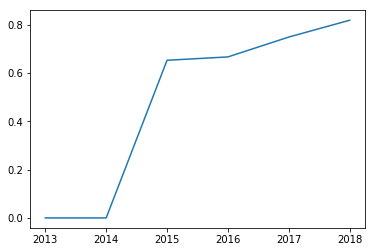

In [230]:
plt.plot(ALoup.Year, ALoup.Sink_Cut)

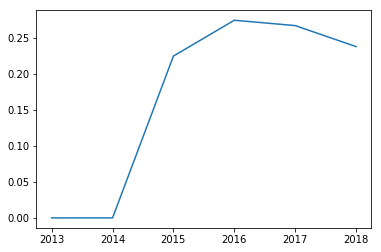

In [76]:
plt.plot(AWainwright.Year, AWainwright.Sinker)

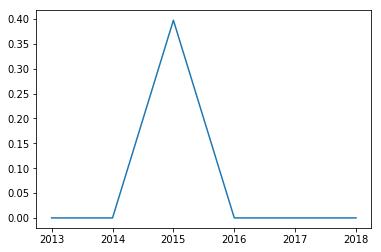

In [79]:
plt.plot(AWood.Year, AWood.Sinker)

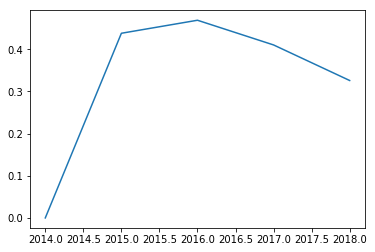

In [83]:
plt.plot(AChafin.Year, AChafin.Sinker)

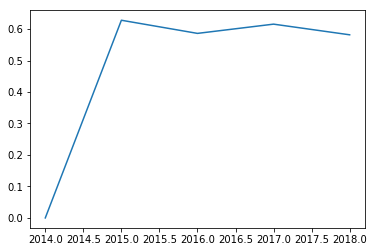

In [86]:
plt.plot(AHeaney.Year, AHeaney.Sinker)

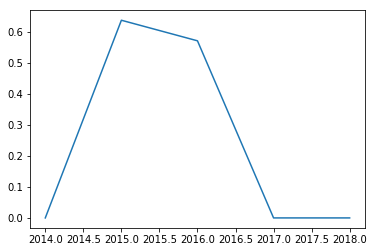

In [89]:
plt.plot(AVizcaino.Year, AVizcaino.Sinker)

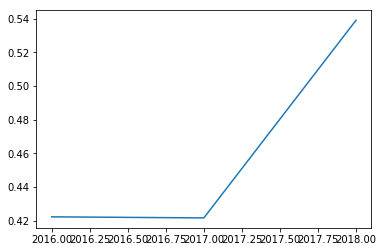

In [92]:
plt.plot(ABrice.Year, ABrice.Sinker)

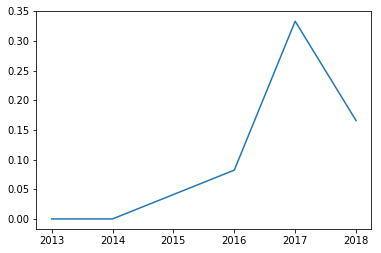

In [95]:
plt.plot(BWood.Year, BWood.Sinker)

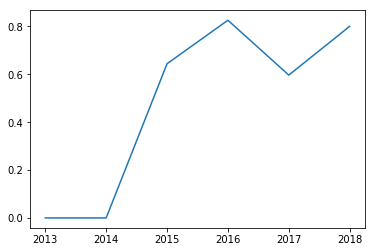

In [98]:
plt.plot(BKintzler.Year, BKintzler.Sinker)

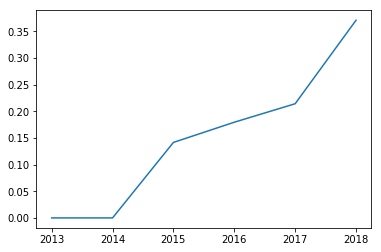

In [101]:
plt.plot(BMcCarthy.Year, BMcCarthy.Sinker)

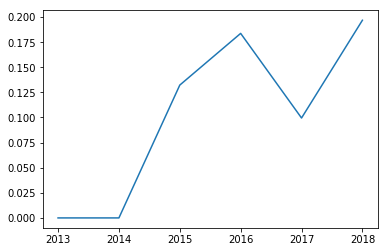

In [104]:
plt.plot(BCecil.Year, BCecil.Sinker)

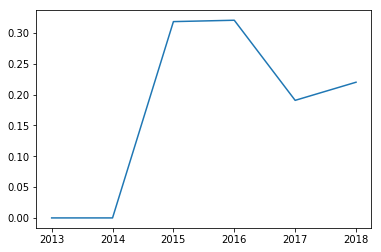

In [107]:
plt.plot(BDuensing.Year, BDuensing.Sinker)

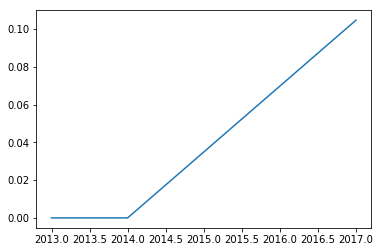

In [110]:
plt.plot(BArroyo.Year, BArroyo.Sinker)

In [365]:
injured = full[full.injured == 1]
not_injured = full[full.injured == 0]

In [35]:
i2015 = injured[injured.Year == 2015]
i2016 = injured[injured.Year == 2016]
i2017 = injured[injured.Year == 2017]
i2018 = injured[injured.Year == 2018]

In [367]:
h2013 = not_injured[not_injured.Year == 2013]
h2014 = not_injured[not_injured.Year == 2014]
h2015 = not_injured[not_injured.Year == 2015]
h2016 = not_injured[not_injured.Year == 2016]
h2017 = not_injured[not_injured.Year == 2017]
h2018 = not_injured[not_injured.Year == 2018]

In [388]:
means = pd.DataFrame({'Year': [2015, 2016, 2017, 2018], 'inj': [0.145, 0.166, 0.150, 0.134], 'healthy': [0.149, 0.132, 0.125, 0.125]})

In [390]:
means.head()

,Year,inj,healthy
0,2015,0.145,0.149
1,2016,0.166,0.132
2,2017,0.150,0.125
3,2018,0.134,0.125


In [391]:
means.to_csv('means.csv')